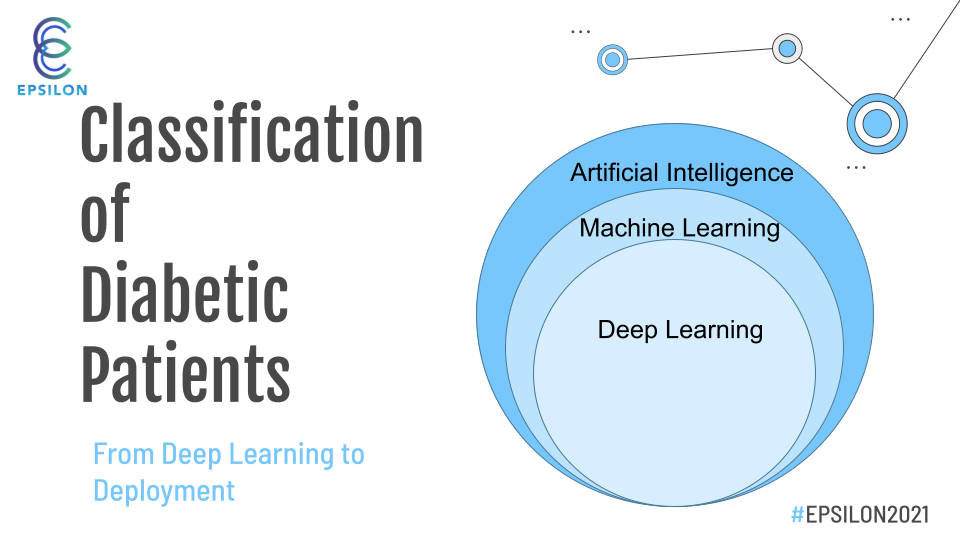

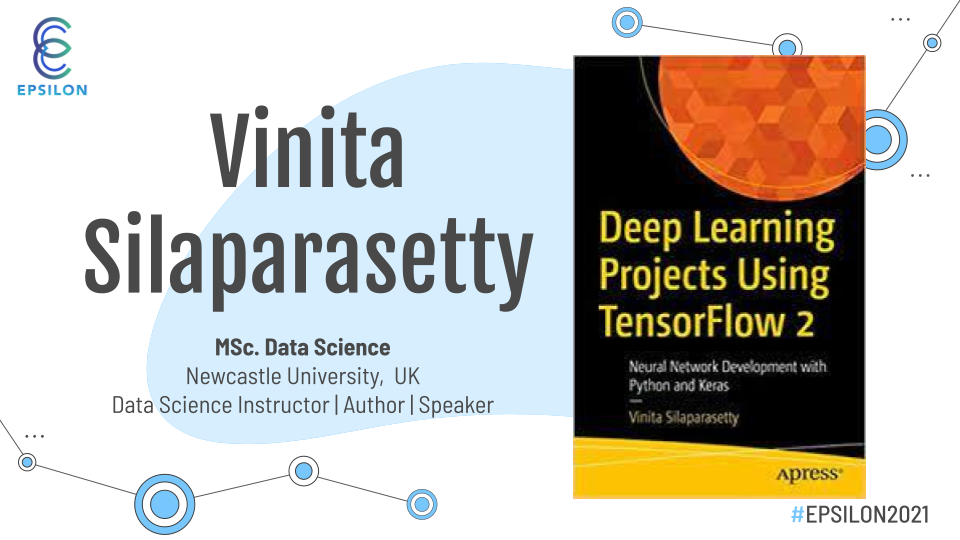

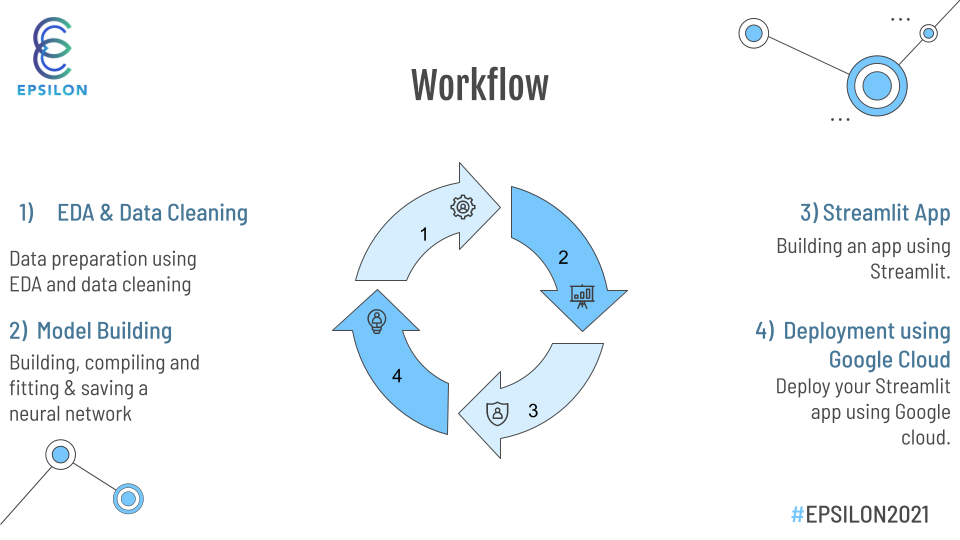

#Let's Start Coding!

### Import Libraries

In [ ]:
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from mlxtend.preprocessing import minmax_scaling 
#from keras.models import load_model
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/ieee_epsilon_2021/master/data/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


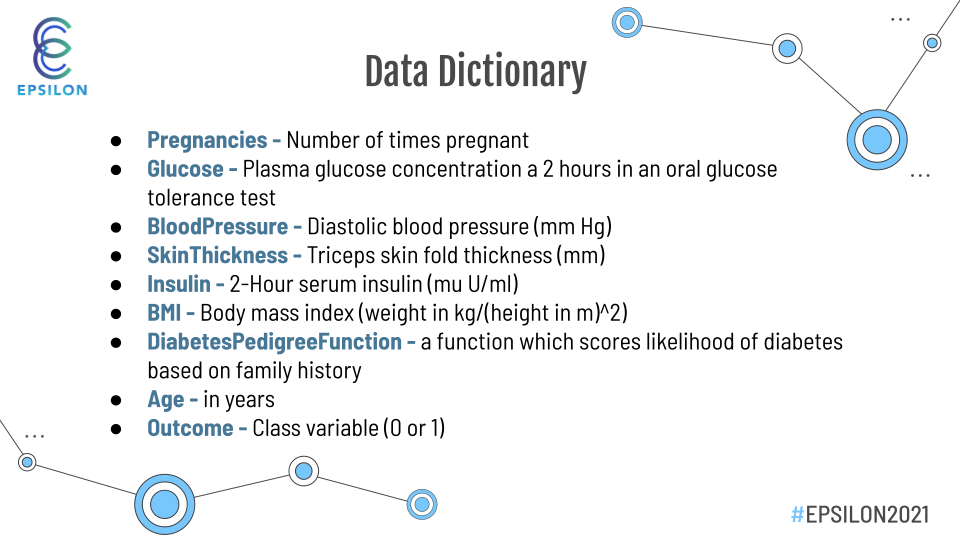

## Descriptive Statistics


In [ ]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


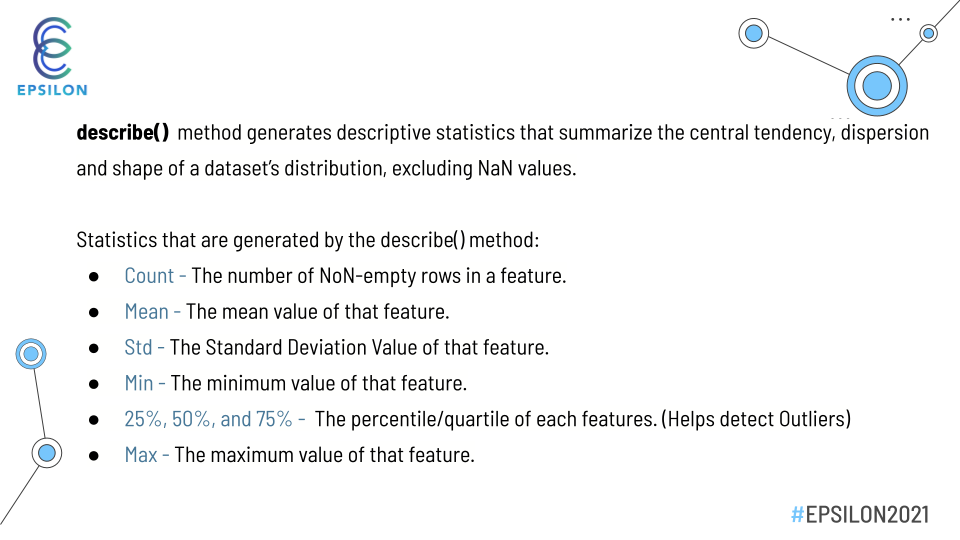

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

### Handling Missing Values

Identifying Missing Values

In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


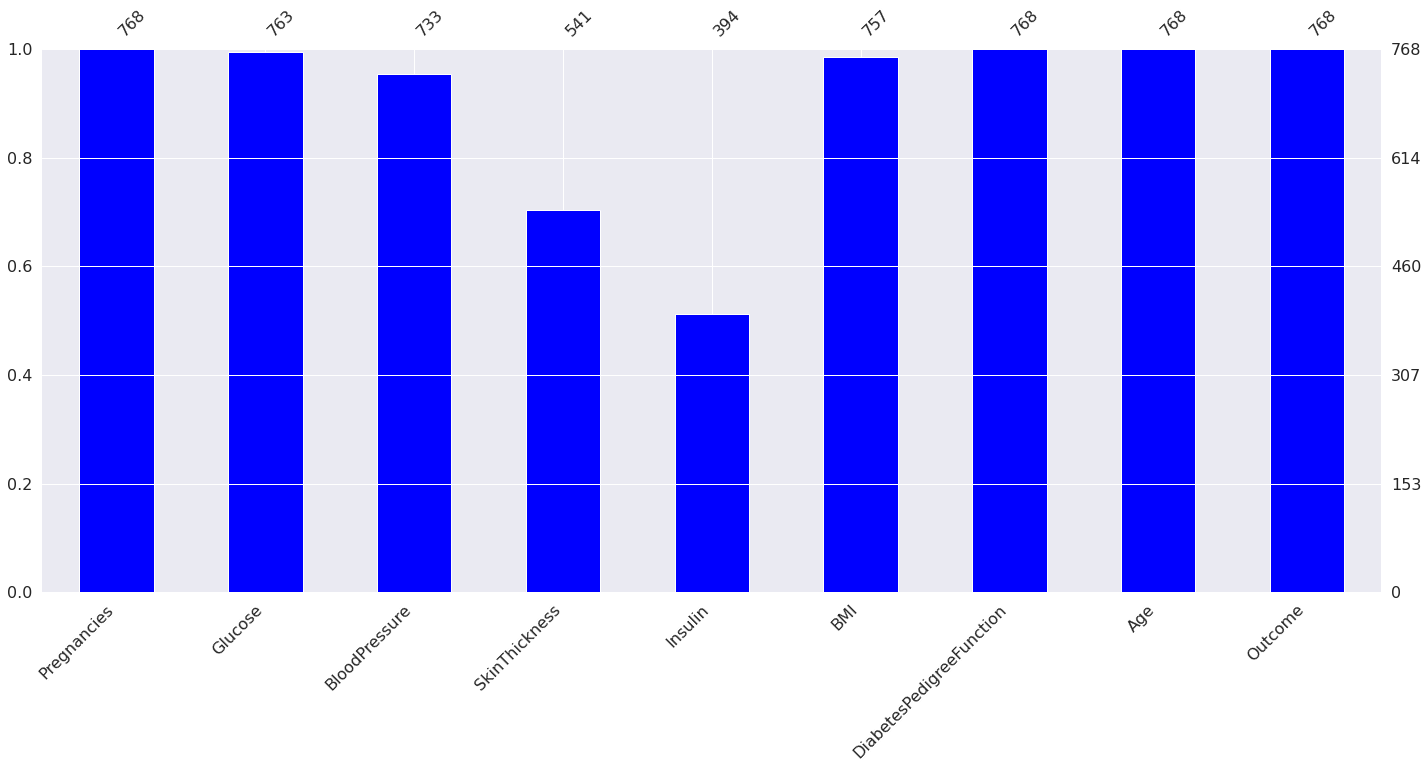

In [ ]:
## visualize null count
import missingno as msno
p=msno.bar(diabetes_data_copy,color='blue')


In [ ]:
#correlation analysis
diabetes_data_copy.corr(method='pearson').max()

Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
Outcome                     1.0
dtype: float64

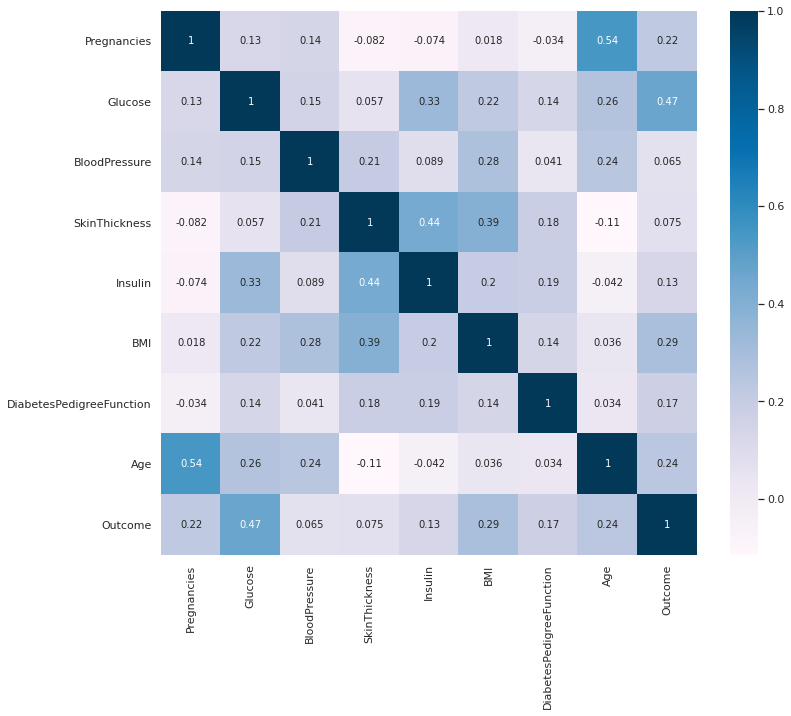

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data.corr(method='pearson'), annot=True,cmap ='PuBu') 

### Imputing Missing Values

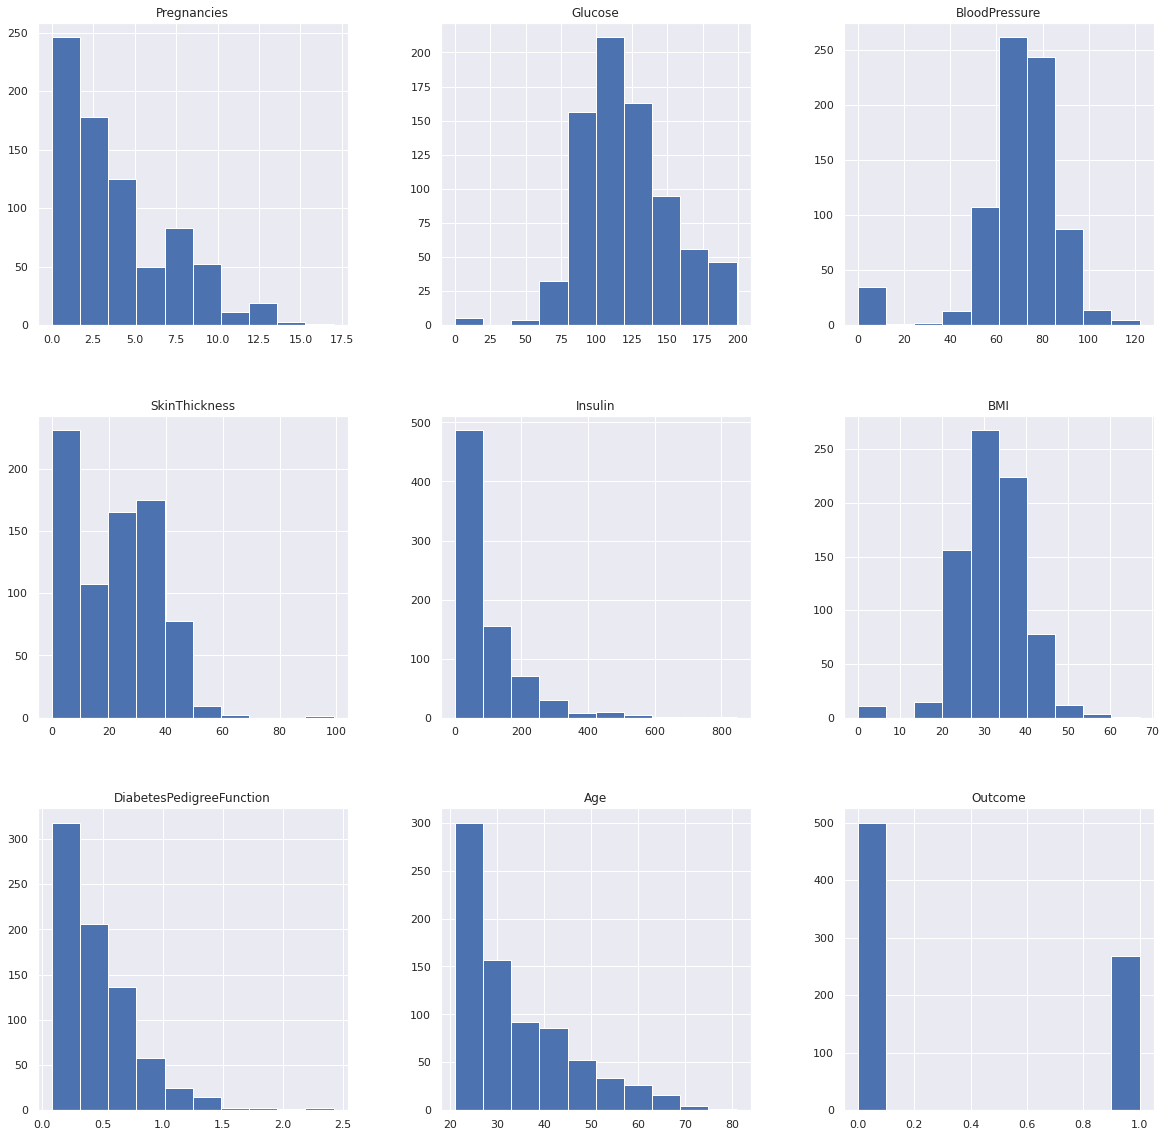

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

### Impute nan values for the columns according to their distribution

In [ ]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

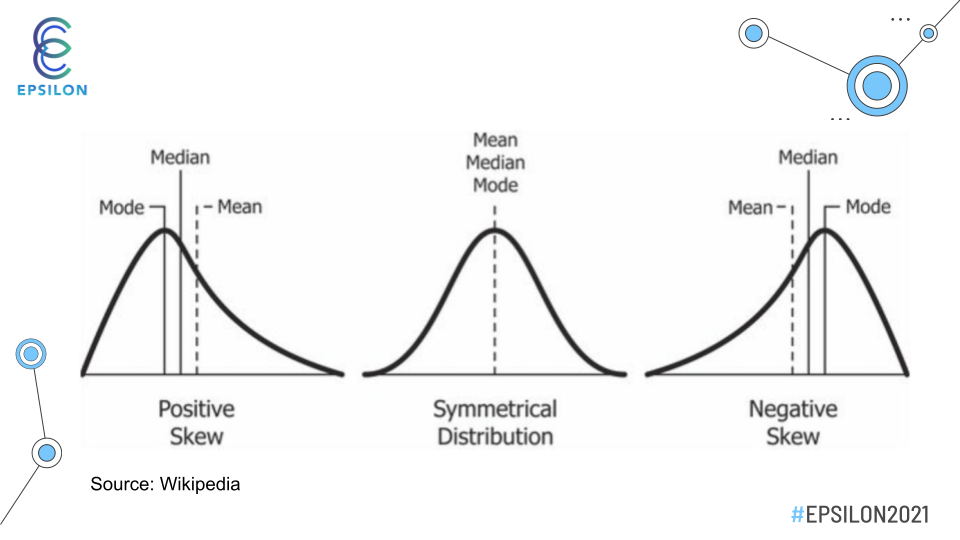

## Plotting after Nan removal 

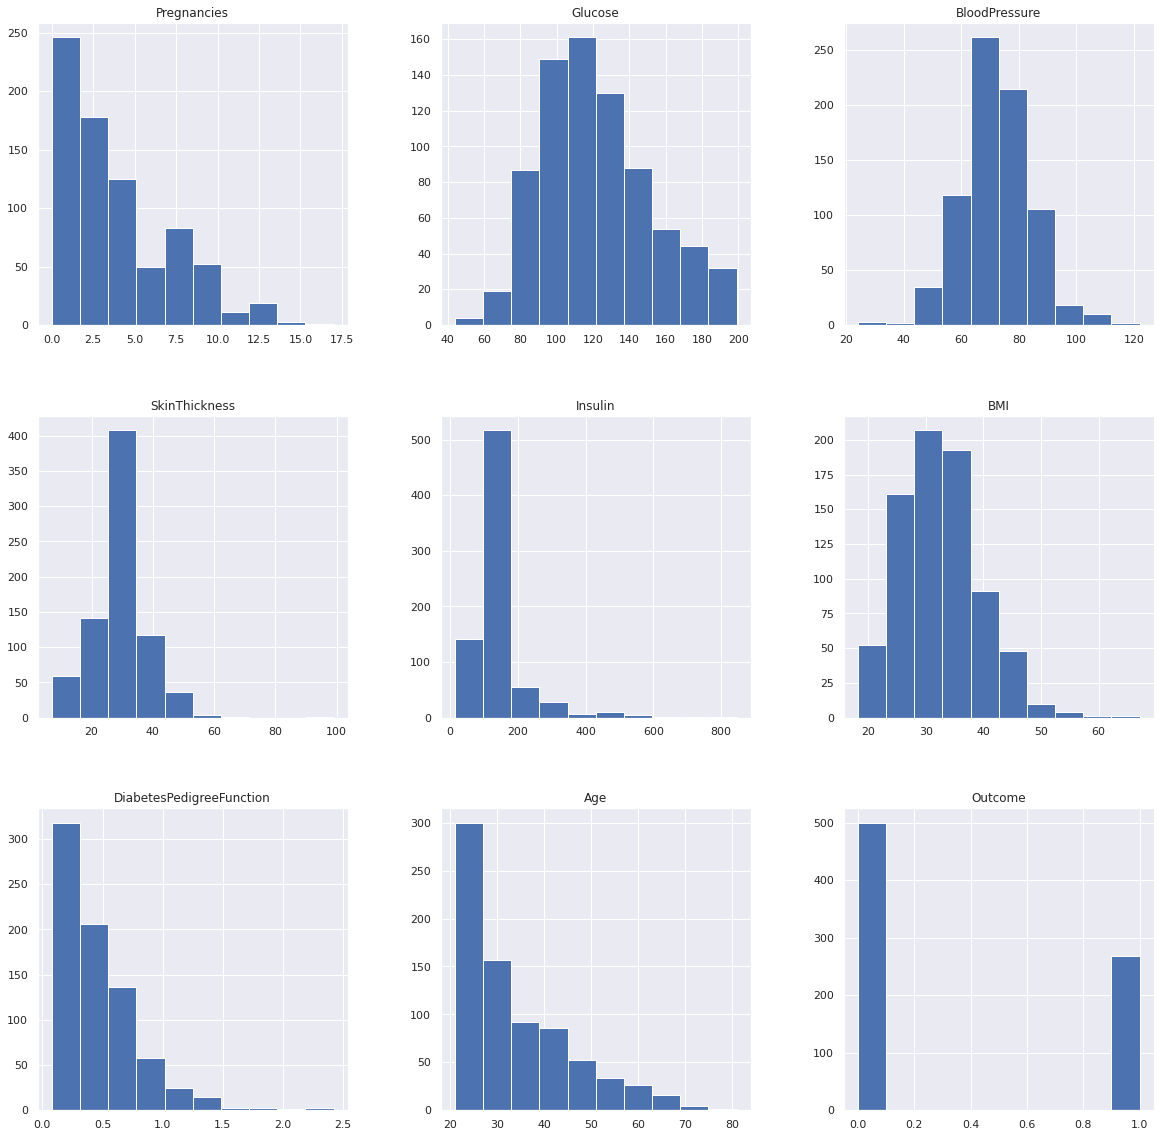

In [ ]:
p = diabetes_data_copy.hist(figsize = (20,20))

#### Pair plot for clean data

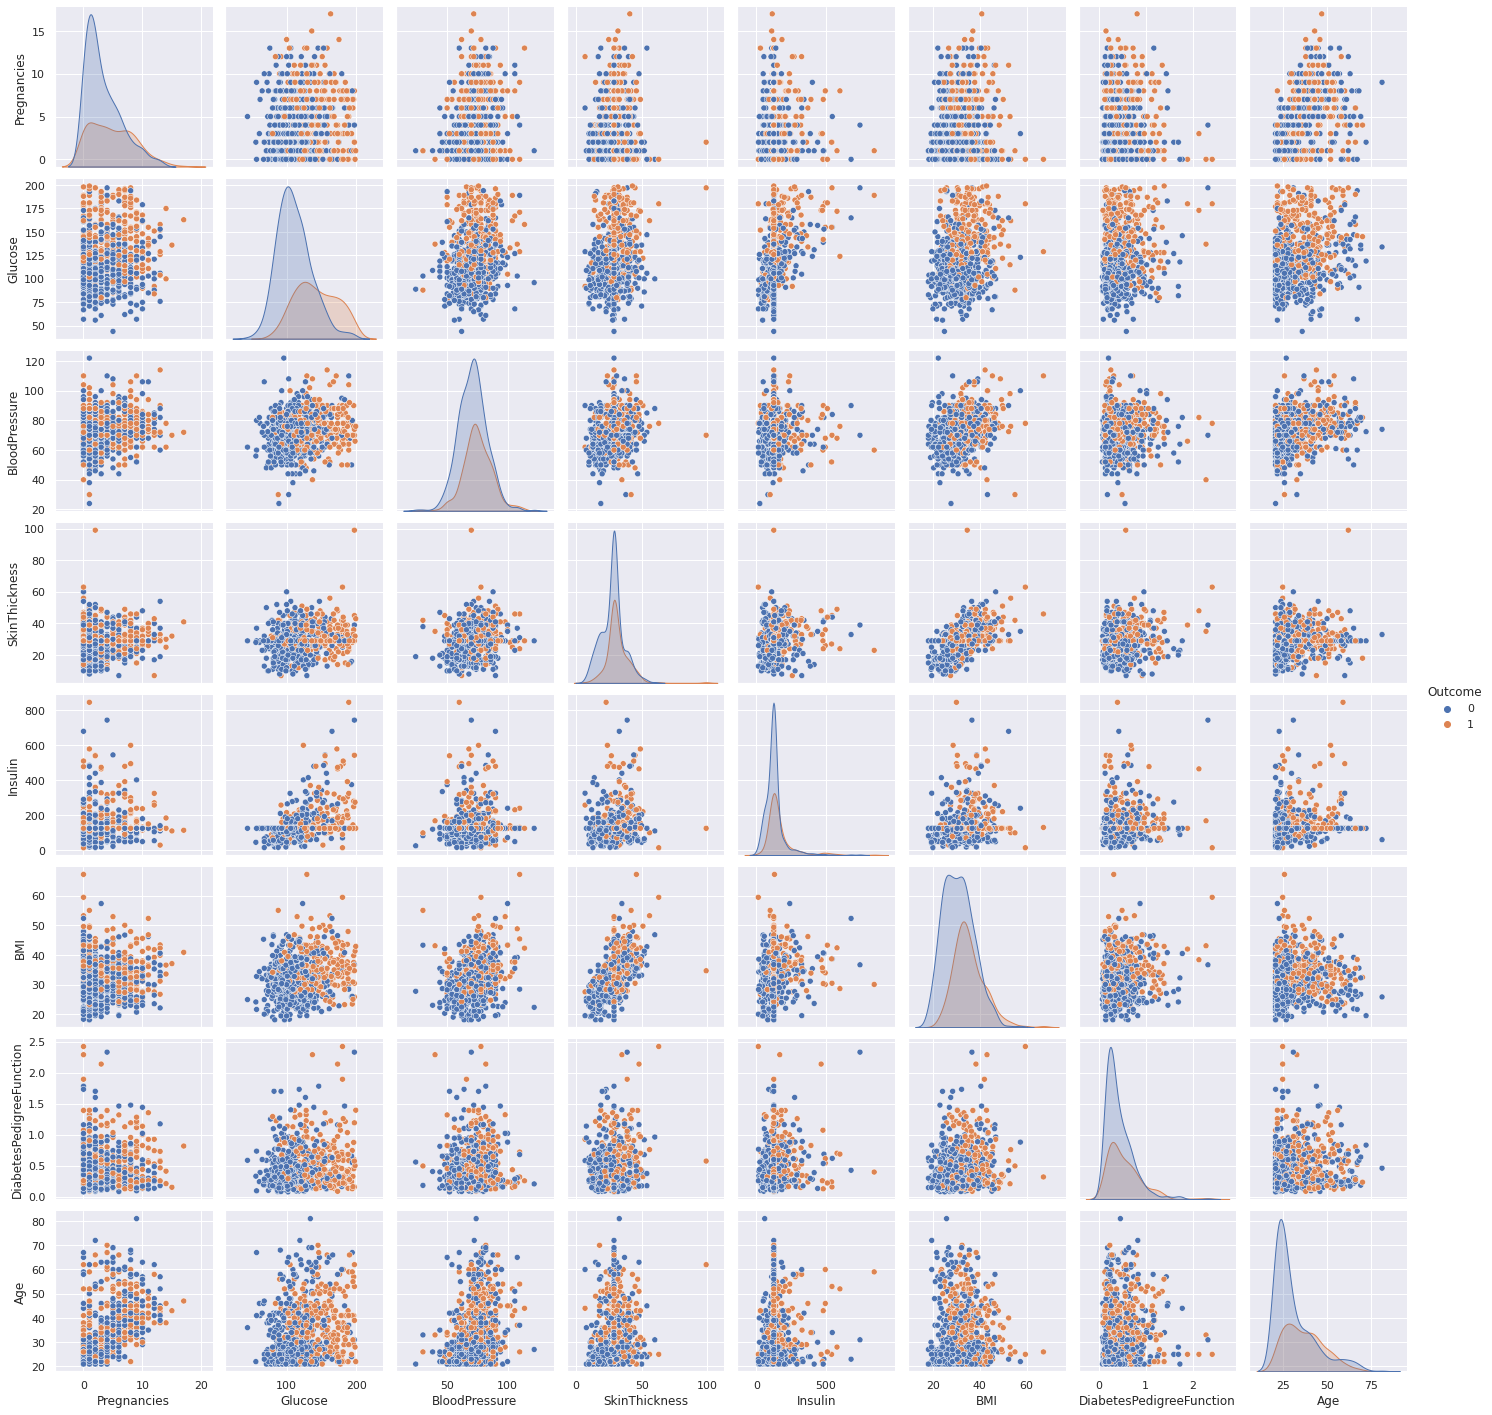

In [ ]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

In [ ]:
def plot_feat1_feat2(feat1, feat2) :  
    D = diabetes_data_copy[(diabetes_data_copy['Outcome'] != 0)]
    H = diabetes_data_copy[(diabetes_data_copy['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        opacity=0.8,
        marker = dict(color = 'lightskyblue',
            line = dict(
                width = 1)))


    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        opacity=0.8,
        mode = 'markers',
        marker = dict(color = 'indigo',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [ ]:
plot_feat1_feat2('Pregnancies', 'Age')

In [ ]:
plot_feat1_feat2('Glucose', 'Insulin')

In [ ]:
plot_feat1_feat2('SkinThickness', 'BMI')

### Standardize Data

In [ ]:
X = minmax_scaling(diabetes_data_copy,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [ ]:
y = diabetes_data_copy.Outcome

## Test Train Split and Cross Validation methods

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

# Model building

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the keras model on the dataset
EPOCHS=1000
model.fit(X, y,epochs=EPOCHS,verbose=2)

Epoch 1/1000
24/24 - 1s - loss: 0.6320 - accuracy: 0.6628
Epoch 2/1000
24/24 - 0s - loss: 0.5841 - accuracy: 0.6901
Epoch 3/1000
24/24 - 0s - loss: 0.5485 - accuracy: 0.7266
Epoch 4/1000
24/24 - 0s - loss: 0.5186 - accuracy: 0.7344
Epoch 5/1000
24/24 - 0s - loss: 0.5025 - accuracy: 0.7396
Epoch 6/1000
24/24 - 0s - loss: 0.4886 - accuracy: 0.7526
Epoch 7/1000
24/24 - 0s - loss: 0.4767 - accuracy: 0.7682
Epoch 8/1000
24/24 - 0s - loss: 0.4726 - accuracy: 0.7539
Epoch 9/1000
24/24 - 0s - loss: 0.4616 - accuracy: 0.7630
Epoch 10/1000
24/24 - 0s - loss: 0.4619 - accuracy: 0.7786
Epoch 11/1000
24/24 - 0s - loss: 0.4621 - accuracy: 0.7708
Epoch 12/1000
24/24 - 0s - loss: 0.4590 - accuracy: 0.7839
Epoch 13/1000
24/24 - 0s - loss: 0.4587 - accuracy: 0.7865
Epoch 14/1000
24/24 - 0s - loss: 0.4509 - accuracy: 0.7747
Epoch 15/1000
24/24 - 0s - loss: 0.4576 - accuracy: 0.7747
Epoch 16/1000
24/24 - 0s - loss: 0.4523 - accuracy: 0.7799
Epoch 17/1000
24/24 - 0s - loss: 0.4503 - accuracy: 0.7760
Epoch 

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 965us/step - loss: 0.3615 - accuracy: 0.8424
Accuracy: 84.24


# Model Performance Analysis

Text(0.5, 12.5, 'Predicted label')

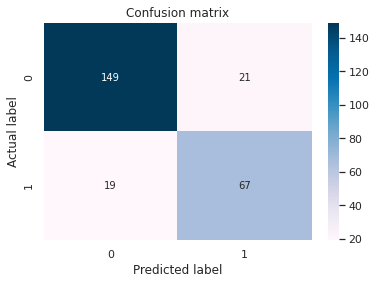

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = model.predict(X_test)
y_pred=np.around(y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
#pd.crosstab(y_test, y_pred[0], rownames=['True'], colnames=['Predicted'], margins=True)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

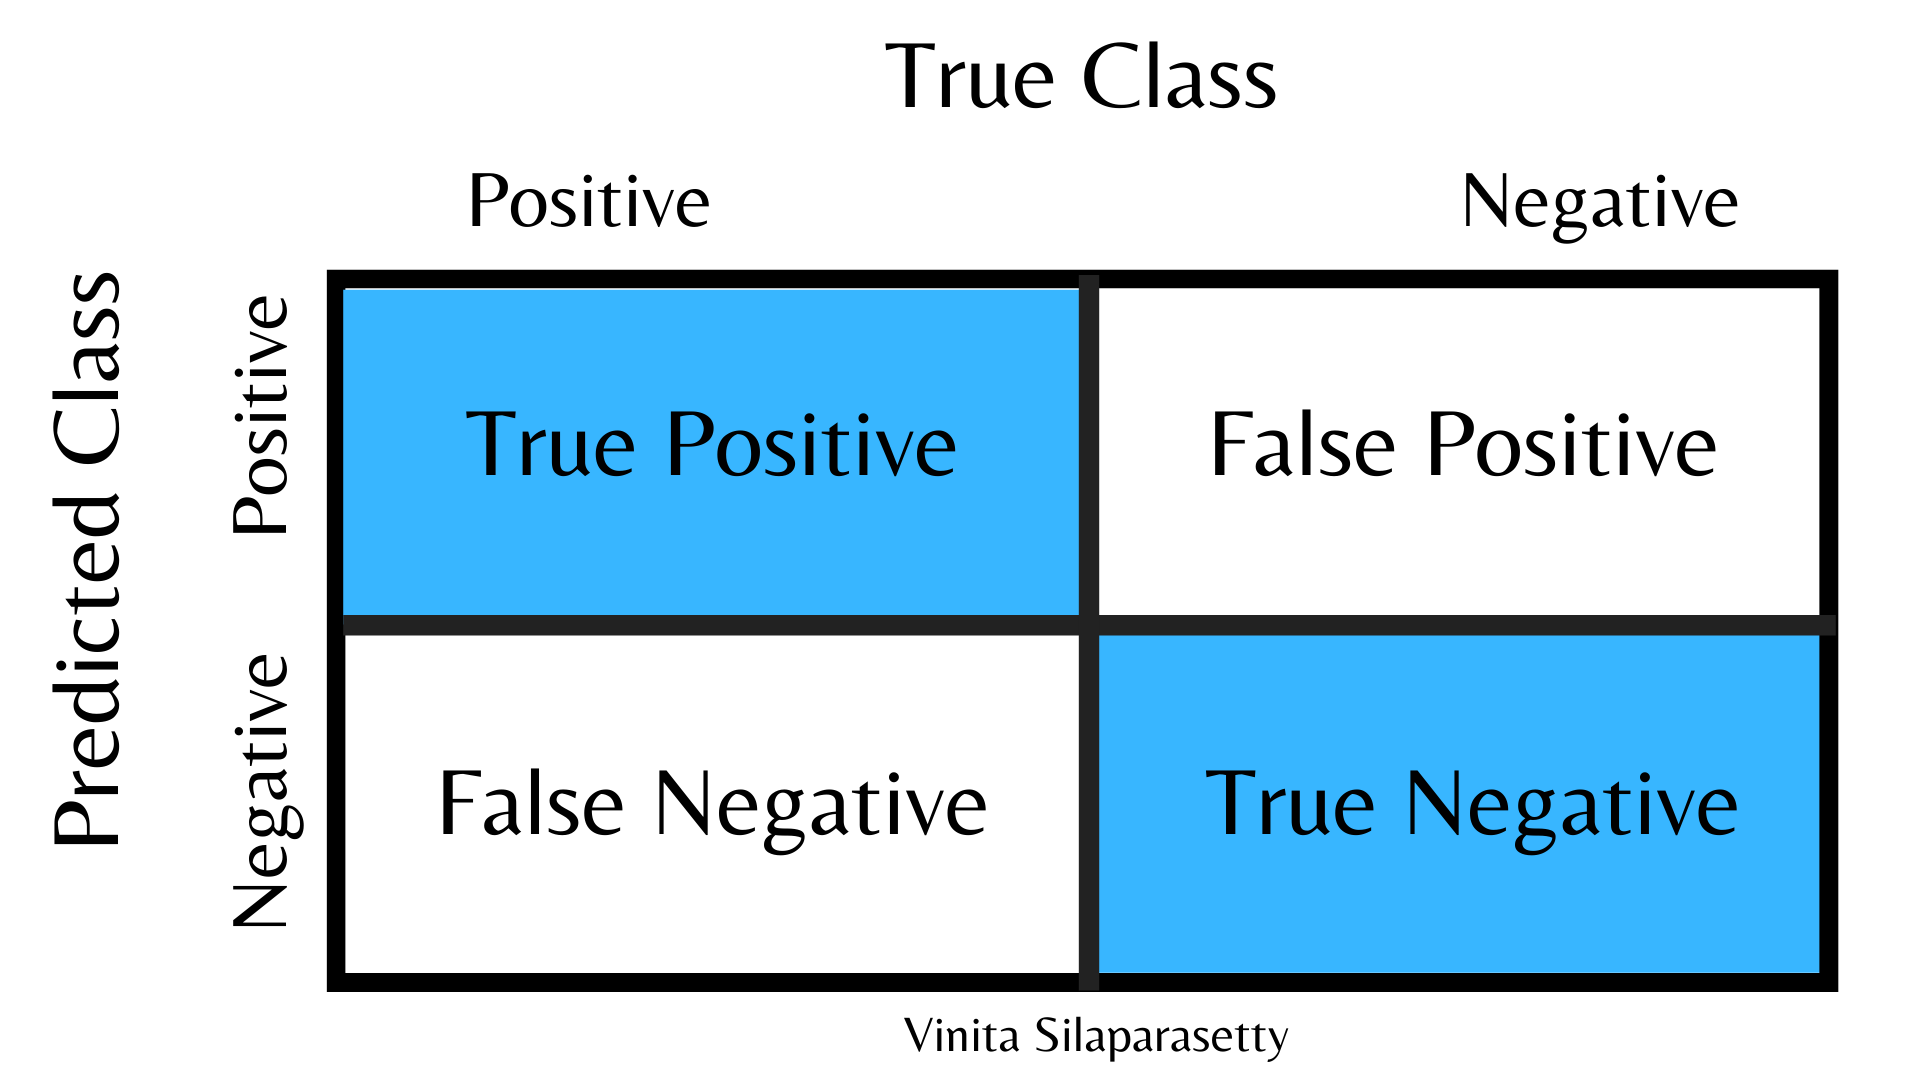

### Save Model

In [ ]:
#save model
model.save("diabetes.h5")